In [48]:
import pandas as pd

In [49]:
# Load data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [50]:
# See first 5 rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
# Shape of data
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset has 7043 rows and 21 columns.


In [52]:
# Data types and non-null counts
print("\nData info:")
df.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

In [53]:
# Quick summary of numeric columns
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [54]:
# look for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# check data types again
print("\nData types:")
print(df.dtypes)



Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentM

In [55]:
print("\nChecking TotalCharges with length zero (blanks):")
print(df[df['TotalCharges'].str.strip() == ''].shape)

# Convert to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm conversion
print("\nConfirm conversion and check for NaN after coercion:")
print(df['TotalCharges'].isnull().sum())

# Impute as zero
df['TotalCharges'] = df['TotalCharges'].fillna(0)


Checking TotalCharges with length zero (blanks):
(11, 21)

Confirm conversion and check for NaN after coercion:
11


In [56]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


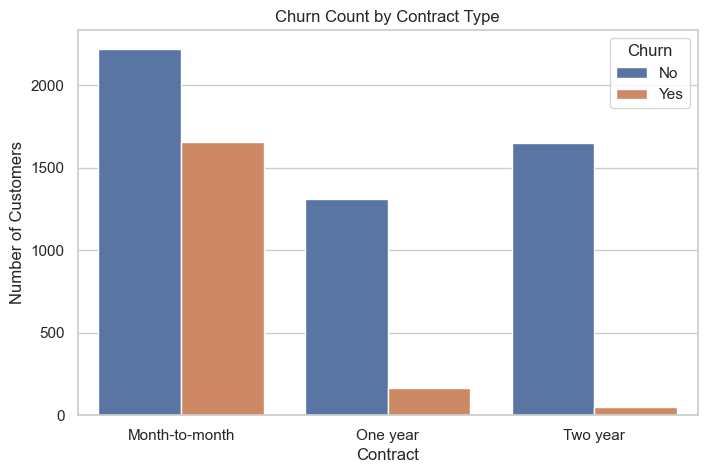

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(x="Contract",hue="Churn",data=df)
plt.title("Churn Count by Contract Type")
plt.ylabel("Number of Customers")
plt.show()

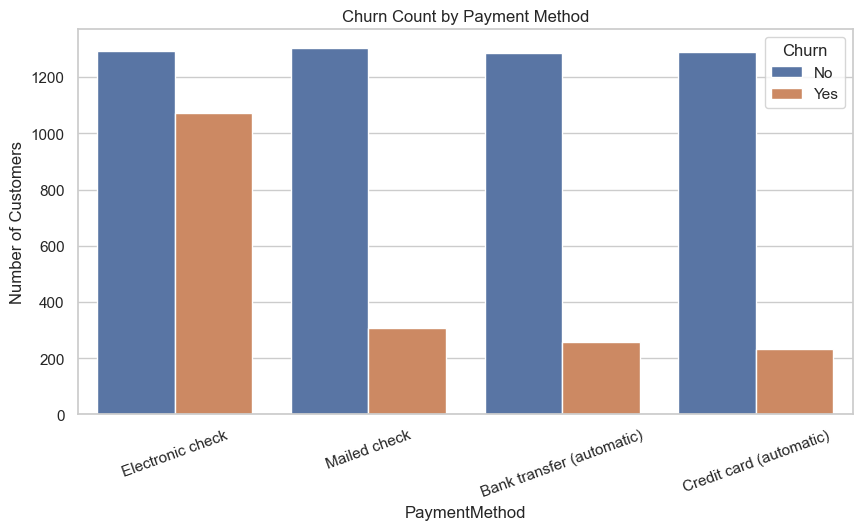

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn Count by Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=20)
plt.show()

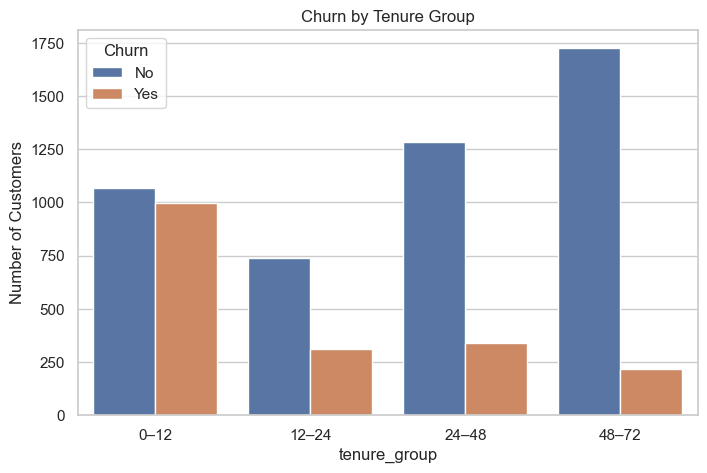

In [59]:
# create tenure buckets
bins = [0, 12, 24, 48, 72]
labels = ['0–12', '12–24', '24–48', '48–72']
df['tenure_group']=pd.cut(df['tenure'],bins=bins,labels=labels,right=False)

# plot
plt.figure(figsize=(8,5))
sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.title("Churn by Tenure Group")
plt.ylabel("Number of Customers")
plt.show()

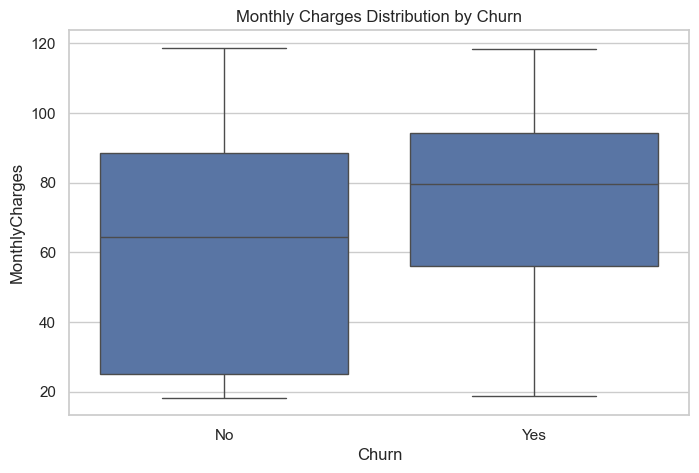

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

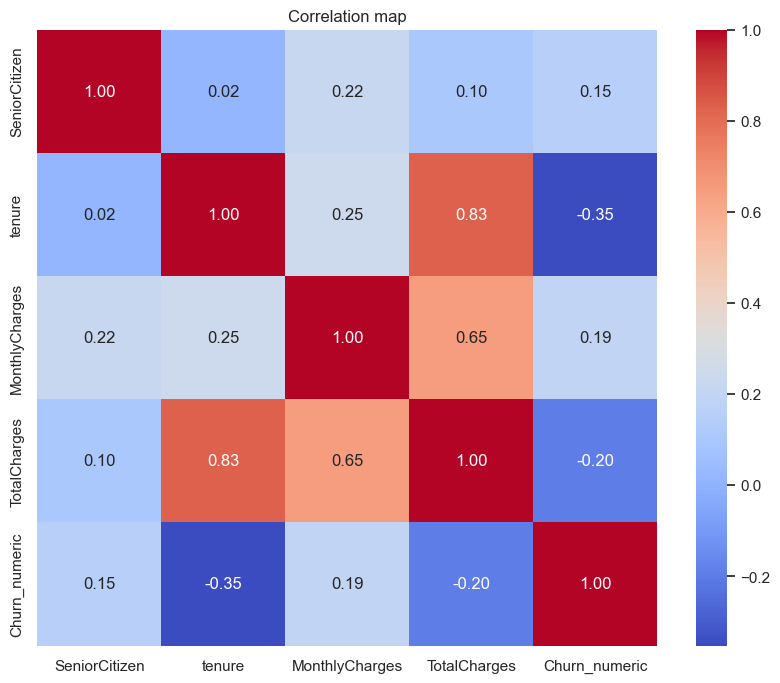

In [61]:
# HEATMAP
# encode Churn as 0/1
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

import numpy as np

# get a subset of numeric columns
numeric_df = df.select_dtypes(include=np.number)

# correlation matrix
corr_matrix = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation map")
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder

# make a copy to avoid messing up the original
df_encoded = df.copy()

# list of categorical columns to encode
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# churn already encoded as Churn_numeric

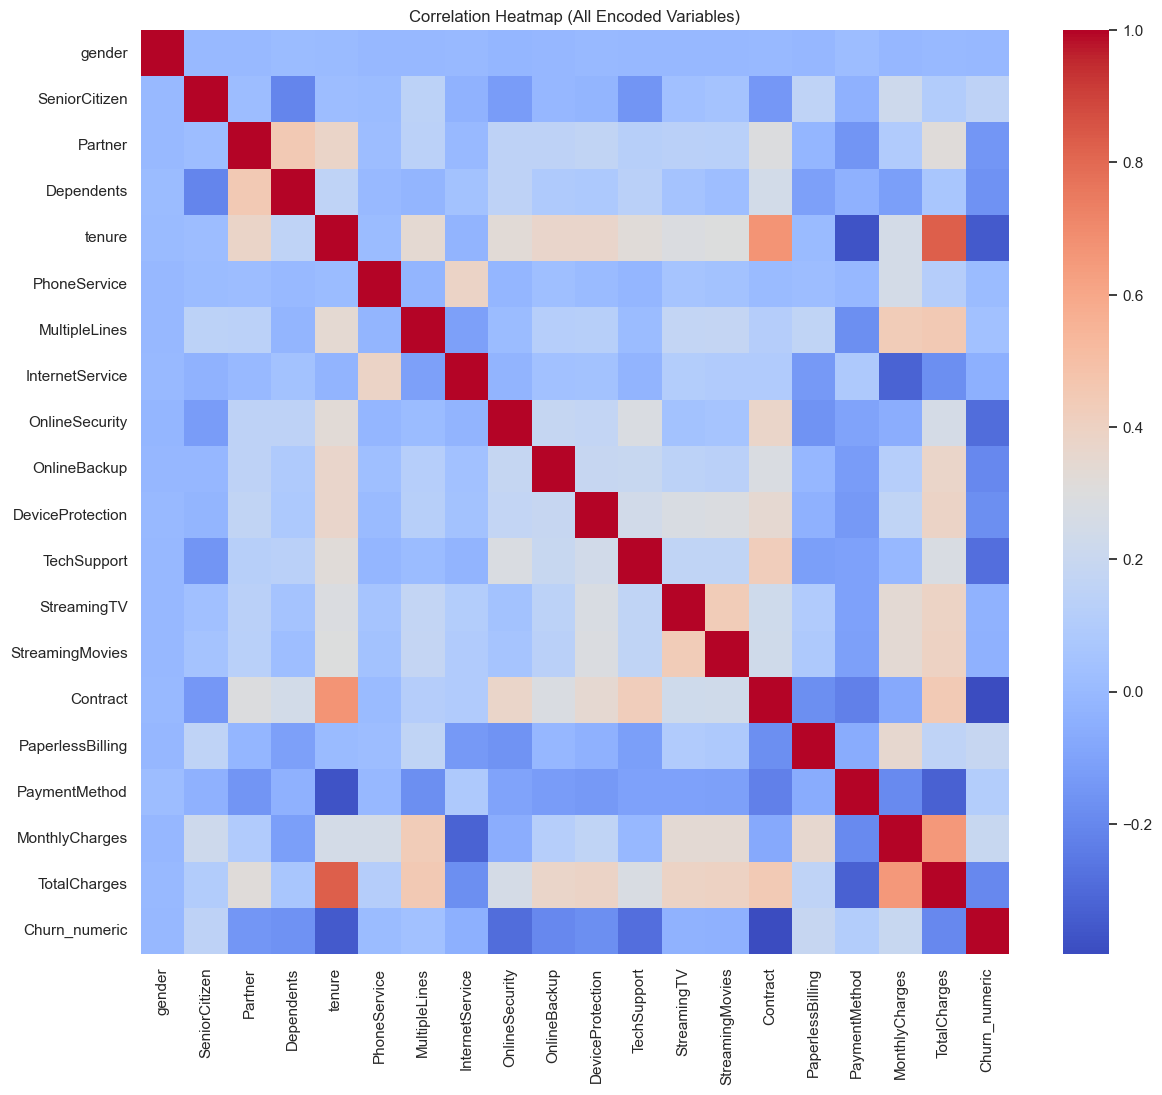

In [ ]:
df_encoded_numeric = df_encoded.drop(columns=['customerID', 'Churn', 'tenure_group'])

# then plot the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(df_encoded_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (All Encoded Variables)")
plt.show()

In [64]:
print(df_encoded.dtypes)

customerID            object
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService        int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract               int64
PaperlessBilling       int64
PaymentMethod          int64
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
Churn_numeric          int64
dtype: object
